Decision tree হলো machine learning এর একটি সহজ এবং জনপ্রিয় algorithm, যা data কে বিভিন্ন প্রশ্ন (yes/no type) এর মাধ্যমে ভাগ করে decision নিতে সাহায্য করে।

# উদাহরণ দিয়ে বুঝি:
ধরো তুমি একটা গাছে climb করবে কিনা সেটা decide করতে চাও। এখন তোমার কাছে কিছু factors আছে:

# Weather ভালো কিনা? (Yes/No)
গাছের height manageable কিনা? (Yes/No)
তোমার হাতে সময় আছে কিনা? (Yes/No)
Decision Tree কীভাবে কাজ করে:
প্রথমে সবচেয়ে গুরুত্বপূর্ণ প্রশ্ন দিয়ে শুরু করবে। যেমন: Weather ভালো কিনা?

# যদি "Yes" হয়, তাহলে পরের প্রশ্ন:
 গাছের height manageable কিনা?
যদি "No" হয়, তাহলে সরাসরি decision: "গাছে climb করবো না।"
এইভাবে প্রতিটি প্রশ্নের উত্তর ধরে ধরে tree-এর শাখা তৈরি হবে।

# শেষে leaf node-এ পৌঁছালে,
 তোমার final decision হবে।

# Decision Tree-এর Key Points:
Root Node: যেখান থেকে প্রশ্ন শুরু হয় (e.g., Weather ভালো কিনা?).

Branch: প্রতিটি প্রশ্নের possible answer (Yes/No).

Leaf Node: Final decision (e.g., গাছে climb করবে বা করবে না)।
কোথায় ব্যবহার হয়?
Customer কে loan approve করবে কিনা।
কোন ধরনের খাবার recommend করবে।
Disease diagnosis ইত্যাদিতে।

# Decision Tree-এর সুবিধা:
খুবই সহজ এবং ব্যাখ্যা করা সহজ।
ছোট dataset-এ ভালো কাজ করে।
অসুবিধা:
বড় dataset-এ overfit করতে পারে (খুব বেশি complex হয়ে যায়)।
সবসময় accurate না হতে পারে।
এইটা basically একটা গাছের মতো structure, যেখানে প্রতিটি প্রশ্নের উত্তর ধাপে ধাপে decision-এ পৌঁছে দেয়।

# Entropy হলো decision tree-এর একটি মাপকাঠি, যা data-র অগোছালো অবস্থা বা অনিশ্চয়তা বোঝায়। এটি বলে, একটি dataset কতটা mix বা random।

সহজভাবে বলি:
ধরো, তুমি একটা ব্যাগে লাল আর নীল বল রেখেছ।

যদি ব্যাগে সব বল লাল হয় (কোনো confusion নেই), তখন entropy 0।
আর যদি ব্যাগে লাল আর নীল বল সমান সংখ্যায় থাকে (confusion বেশি), তখন entropy উচ্চ।

#Decision Tree-তে Entropy-এর কাজ:
Decision tree-তে entropy ব্যবহার করা হয়, কোন প্রশ্ন বা attribute dataset-কে সবচেয়ে ভালোভাবে ভাগ করবে তা বোঝার জন্য। আমরা এমন প্রশ্ন বা attribute বেছে নেই যা entropy কমায়, অর্থাৎ dataset-কে কম random বা বেশি নিশ্চিত করে তোলে।

#উদাহরণ:
ধরো, তুমি জানো না তোমার বন্ধু pizza খাবে নাকি burger।

যদি সে সবসময় pizza খায়, তাহলে কোনো confusion নেই। Entropy 0।
যদি সে 50% সময় pizza আর 50% সময় burger খায়, তাহলে confusion বেশি। Entropy বেশি।
ফর্মুলা (সহজভাবে):

#Decision Tree-এর প্রক্রিয়া:
প্রথমে সমস্ত data-র entropy calculate করে।
তারপর যেসব প্রশ্ন (attributes) entropy কমায়, সেগুলো prioritize করে।
এইভাবে dataset-কে যতটা সম্ভব "clean" বা "pure" group-এ ভাগ করে।
উদাহরণ দিয়ে Decision Tree-এর সম্পর্ক:
যদি weather ভালো (sunny) হয়, তখন entropy কমে যায় (decision পরিষ্কার হয়ে যায়)।
যদি weather random (sunny, rainy, cloudy সব mix) হয়, entropy বেশি (decision unclear)।
সহজ কথা:
Entropy হলো confusion মাপার স্কেল। Decision tree-তে আমরা এমন attribute বেছে নেই যেটা confusion (entropy) কমায়, যাতে final decision সহজ হয়।

### Libraries

In [5]:

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Loading the Dataset

In [6]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.shape

(10000, 14)

In [8]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


### Dropping Unnecessary Columns:

In [9]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis = 1)
# axis = 1 means columns, 0 means rows
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data.shape

(10000, 11)

### Gender and Geography are the catagorical feature here
So we need to encode them


In [11]:
le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])
#  Gender: Female -> 0, Male -> 1
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [13]:
ohe_geography = OneHotEncoder(drop='first')
geo_encoded = ohe_geography.fit_transform(data[['Geography']]).toarray()
geo_encoded_df = pd.DataFrame(geo_encoded, columns=ohe_geography.get_feature_names_out(['Geography']))
geo_encoded_df



,Geography_Germany,Geography_Spain
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
9995,0.0,0.0
9996,0.0,0.0
9997,0.0,0.0
9998,1.0,0.0


In [15]:
data = pd.concat([data.drop(columns=['Geography']), geo_encoded_df], axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0


In [16]:
data.shape

(10000, 12)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  float64
 11  Geography_Spain    10000 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 937.6 KB


### Necessary EDA (Basic Descriptive Statistics)

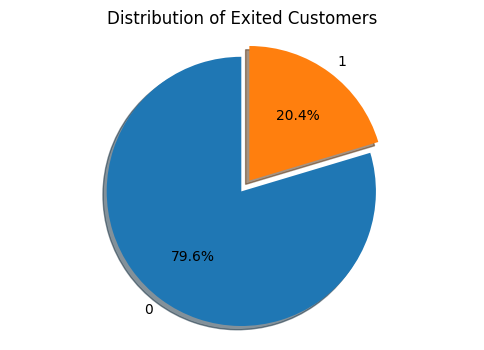

In [18]:
exited_counts = data['Exited'].value_counts()
plt.figure(figsize=(6,4))
plt.pie(exited_counts, labels=exited_counts.index, autopct='%1.1f%%', startangle=90,
explode=(0,0.1),
shadow=True)
plt.title('Distribution of Exited Customers')
plt.axis('equal')
plt.show()


In [19]:
# Correlation :
data.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,-0.024628,0.016889
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482
Exited,-0.027094,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667


In [20]:
data.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000


### Splitting Features and Target

In [21]:
X = data.drop(columns=['Exited'], axis = 1)
y = data[['Exited']]

In [22]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,1.0


In [23]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


### Split the data into 70% training and 30% testing sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
X_train.shape

(7000, 11)

In [26]:
X_test.shape

(3000, 11)

### Decision Tree

In [27]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
accuracy_score(y_test, y_pred)


0.8043333333333333

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2416
           1       0.50      0.52      0.51       584

    accuracy                           0.80      3000
   macro avg       0.69      0.70      0.69      3000
weighted avg       0.81      0.80      0.81      3000

